<a href="https://colab.research.google.com/github/yohanesnuwara/66DaysOfData/blob/main/D14_EDA_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis for NLP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from collections import defaultdict, Counter

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
!wget 'https://github.com/yohanesnuwara/datasets/raw/master/abcnews-date-text.csv.zip'
!unzip '/content/abcnews-date-text.csv.zip'

--2021-07-17 03:51:32--  https://github.com/yohanesnuwara/datasets/raw/master/abcnews-date-text.csv.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yohanesnuwara/datasets/master/abcnews-date-text.csv.zip [following]
--2021-07-17 03:51:32--  https://raw.githubusercontent.com/yohanesnuwara/datasets/master/abcnews-date-text.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22082559 (21M) [application/zip]
Saving to: ‘abcnews-date-text.csv.zip’

abcnews-date-text.c 100%[===================>]  21.06M  30.9MB/s    in 0.7s    

2021-07-17 03:51:33 (30.9 MB/s) - ‘abcnews-date-text.csv.zip’ sav

In [3]:
news = pd.read_csv('/content/abcnews-date-text.csv', nrows=10000)

news.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


## Character-level, word-level, frequencies, and stopwords

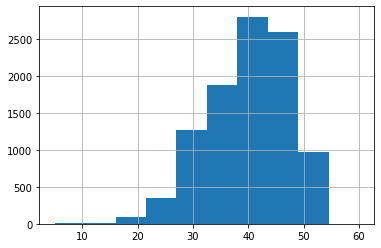

In [4]:
# Plot histogram of number of characters
news['headline_text'].str.len().hist()

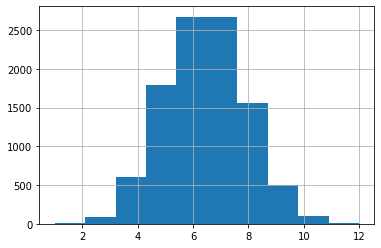

In [5]:
# Plot histogram of number of words
news['headline_text'].str.split().map(lambda x: len(x)).hist()

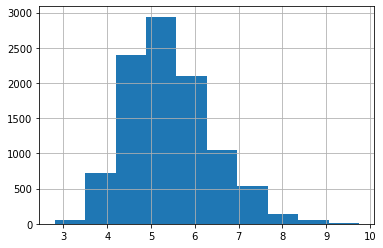

In [6]:
# Plot histogram of average number of words
news['headline_text'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

Stopwords are the words that are most commonly used in any language such as “the”,” a”,” an” etc. As these words are probably small in length these words may have caused the above graph to be left-skewed.

<BarContainer object of 10 artists>

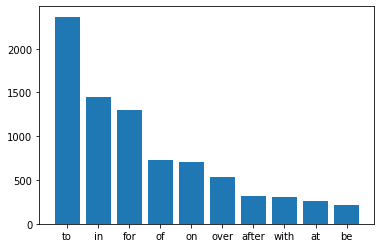

In [7]:
stop = set(stopwords.words('english'))

corpus=[]
new= news['headline_text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)

Stopwords such as "to", "in" and "for" dominate in news headlines.

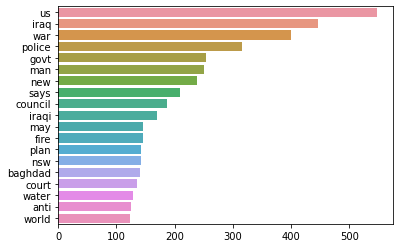

In [8]:
# which words other than these stopwords occur frequently.
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

## N-gram exploration

In [9]:
# Bigram of a sentence. Trigram=3, and so on.
list(ngrams(['I' ,'went','to','the','river','bank'], 2))

[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

Represent the vocabularies through vectorizing.

In [10]:
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

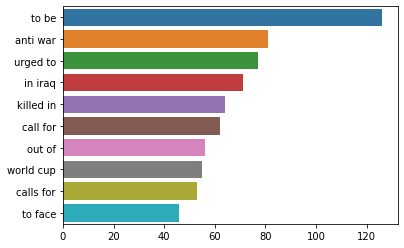

In [11]:
# Top bigrams
top_n_bigrams = get_top_ngram(news['headline_text'],2)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

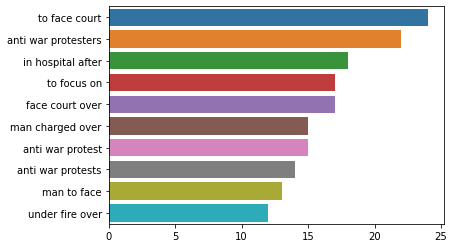

In [12]:
# Top trigrams
top_n_bigrams = get_top_ngram(news['headline_text'],3)[:10] 
x,y=map(list,zip(*top_n_bigrams)) 
sns.barplot(x=y,y=x)

We see trigrams like "to face court" and "anti war protesters" occur often in the above barplots with similar redundant trigrams like "face court over" and "anti war protest". With data cleansing, we can remove redundancy. 

References: 

* https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools